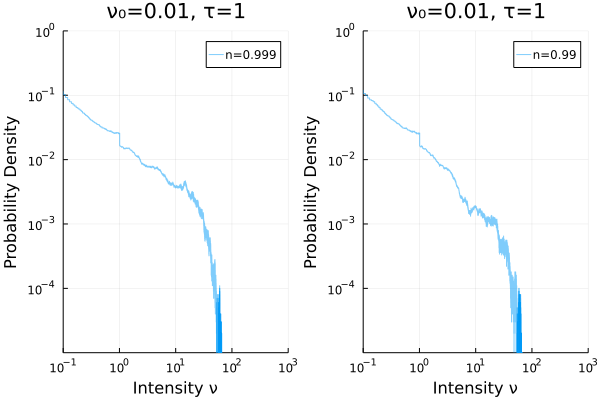

LoadError: InterruptException:

In [15]:
using Plots

# パラメータ
τ = 1.0
dt = 0.001
T = 10000
ν_0_values = [0.01, 0.2, 1.0]
n_values = [0.999, 0.99]

# 強度ν(t)の計算関数
function calculate_ν(t, events, n, ν_0, τ)
    ν_t = ν_0 + sum((1/τ) * exp.(-(t .- events[events .<= t]) / τ))
    return ν_t
end

# P_{ss}(ν)の式
P_ss(ν, ν_0, τ, n) = ν^(-1 + 2*ν_0*τ) * exp(-2*τ*(1-n)*ν)

# シミュレーションとグラフのプロット
function simulate_and_plot(ν_0, τ, T, dt, n_values)
    plots = []
    for n in n_values
        events = Float64[]
        t = 0.0
        while t <= T
            ν_t = calculate_ν(t, events, n, ν_0, τ)
            if rand() < ν_t*dt
                push!(events, t)
            end
            t += dt
        end
        
        intensities = [calculate_ν(t, events, n, ν_0, τ) for t in 0:dt:T]
        p = histogram(intensities, normed=true, label="n=$n", xscale=:log10, yscale=:log10, xticks=10.0 .^ (-1:3), yticks=10.0 .^ (-5:0), xlims=(10^-1, 10^3), ylims=(10^-5, 10^0), alpha=0.5)
        push!(plots, p)
    end
    plot(plots..., legend=:topright)
end

# 各ν_0の値に対してグラフを生成
for ν_0 in ν_0_values
    simulate_and_plot(ν_0, τ, T, dt, n_values)
    title!("ν₀=$ν_0, τ=1")
    xlabel!("Intensity ν")
    ylabel!("Probability Density")
    display(plot!())
end
